<a href="https://colab.research.google.com/github/EbubeObioma/EbubeObioma/blob/main/FantasyFootballClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fantasy Football Cluster Analysis
In this project, I will be analyzing the valuation of players based on last season's performance, in order to identify players of different potentials for each season. This will help us to understand the players performance patterns and fantasy returns and to determine the exact price to set for each player at the start of the new season.

In [3]:
#importing the necessary libraries and mounting google drive for file storage and retrieval.
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #setting the limits of columns and rows displayed

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Python for Data/fpl_data.csv')#reading the dataset

In [6]:
data #viewing the entire dataset

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
7,David Luiz,Arsenal,Defender,1,0,41,1396,20,46.7,250.6,144,0,3
8,Edward Nketiah,Arsenal,Forward,2,1,36,411,6,97.3,116.6,211,5,1
9,Emile Smith Rowe,Arsenal,Midfielder,2,5,74,1438,10,385.1,273.2,222,3,9


In [7]:
data.shape #Viewing the number of rows and columns

(476, 13)

# Observation
The dataframe has 476 rows and 13 columns.

In [8]:
data.info() #Checking the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


# Observation
The dataframe has the following data types;
1. Objects: Player_Name, Club, Position
2. Integers: Goals_Scored, Assists, Total_Points, Minutes, Goals_Conceded, Threat, Bonus, Clean_Sheets
3. Floating Points: Creativity, Influence

In [9]:
data.describe(include='all').T #seeing the summary statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Willy Boly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


# Observation
The 476 rows in the dataframe give us information about 476 different players from 17 different football clubs in the league.
There are 4 diffreetn positions that each player could have but the position with the highest number of players is midfield with 195 players.
30 of the players are from Arsenal making it the clubs with the most players in our data.
The average number of goals is 1.9 with a standard deviation of 3.4. 25% of the players scored 0 goals, 75% have 2 goals and less while 50% have at least 5 goals. The most goals scored by a player during the season is 23.
The average number of assists is 1.7 with a standard deviation of 2.7. 25% of the players have 0 assists, 75% have 2 assists and less while 50% have 0 assists. The most assists by a player during the season is 14.
The players played an average of 1337 minutes with the maximum at 3420 minutes.



In [10]:
data['Club'].value_counts()

,count
Club,
Arsenal,30
Crystal Palace,30
Leeds United,29
Leicester City,29
Newcastle United,29
Tottenham Hotspurs,29
West Ham United,29
Chelsea,28
Brighton and Hove Albion,28


Showing the distribution of players per club.

In [11]:
data['Position'].value_counts()#seeing the player positions

,count
Position,
Midfielder,195
Defender,172
Forward,64
Goalkeeper,45


Showing the distribution of players per position.

In [12]:
data['Position'].nunique()

4

In [13]:
data[data['Goals_Scored'] >= 15].sort_values(by='Goals_Scored', ascending=False) # Exploring players with the highest number of goals of the season.

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13
177,Dominic Calvert-Lewin,Everton,Forward,16,6,165,2871,39,308.0,745.8,1439,21,11
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8


# Observation
Harry Kane of Tottenham Hotspurs is the highest goal scorer with 23 goals during the season followed by Mohammed Salah of Liverpool with 22 goals and thirdly Bruno Fernandes of Manchester United with 18 goals.

In [14]:
data[data['Assists'] >= 10].sort_values(by='Assists', ascending=False) # Exploring players with assists greater than 10 during the season.

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
136,Timo Werner,Chelsea,Forward,6,12,128,2598,29,532.4,514.8,1276,7,13
39,Jack Grealish,Aston Villa,Midfielder,6,12,135,2183,28,1029.6,707.4,917,13,12
292,Kevin De Bruyne,Manchester City,Midfielder,6,12,141,1995,17,1170.1,760.8,914,19,12
276,Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.7,808.8,1535,14,12
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
326,Marcus Rashford,Manchester United,Midfielder,11,11,174,2917,39,682.1,793.2,1127,9,12
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13


# Observation
Jamie Vardy of Leicester City has the highest number of assists at 14 tied by Bruno Fernandes of Manchester United and Harry Kane of Tottenham Hotspurs.  

In [15]:
data[data['Threat'] >= 1500].sort_values(by='Threat', ascending=False) # Showing the most threatning players of the season.

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
51,Ollie Watkins,Aston Villa,Forward,14,9,168,3328,46,610.4,815.4,1721,18,14
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
276,Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.7,808.8,1535,14,12
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10


Mohammed Salad had the highest threat score and is the second highest goal scorer of the season behind Harry Kane.

In [16]:
data.isnull().sum()#Checking for null values

,0
Player_Name,0
Club,0
Position,0
Goals_Scored,0
Assists,0
Total_Points,0
Minutes,0
Goals_Conceded,0
Creativity,0
Influence,0


There are no missing values in the dataframe.

# Univariate Analysis

In [17]:
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

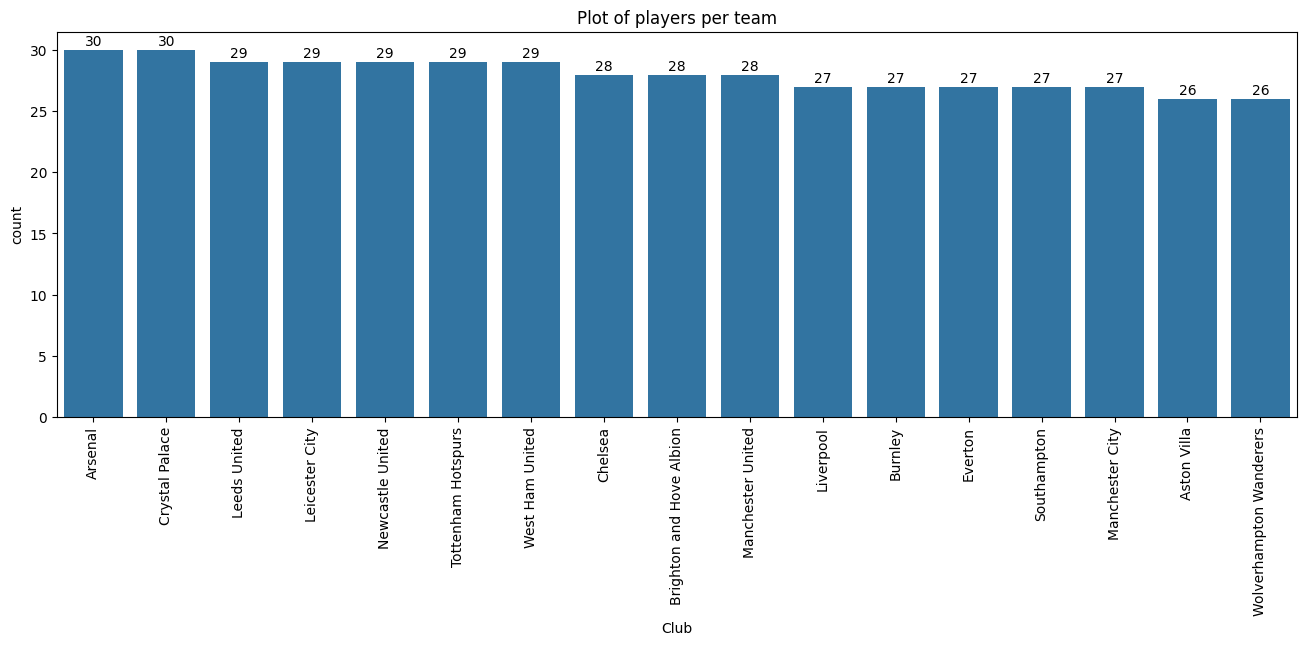

In [18]:
plt.figure(figsize=(16,5))
order = data.groupby('Club')['Player_Name'].count().sort_values(ascending=False).index

axx = sns.countplot(data=data, x='Club', order=order)
plt.xticks(rotation=90)

# Annotate bars
for p in axx.patches:
    axx.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,1), textcoords='offset points'
    )

plt.title("Plot of players per team")
plt.show()



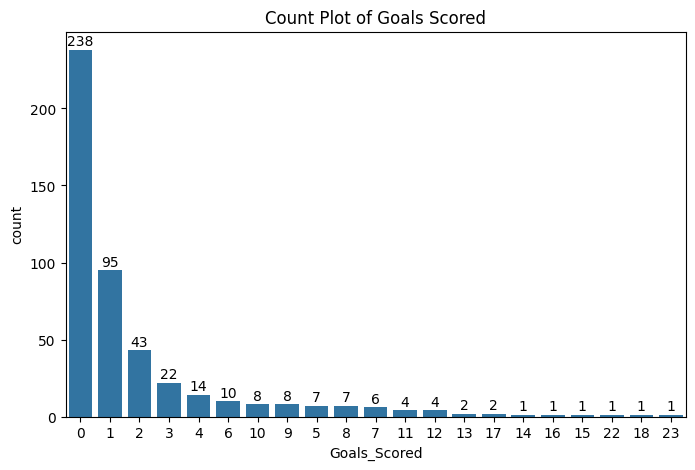

In [19]:
plt.figure(figsize=(8,5)) # Choosing a figure size
ax = sns.countplot(x='Goals_Scored', data=data, order=data['Goals_Scored'].value_counts().index) #Creating a function for the countplot
for p in ax.patches: #Starting a for loop to go through each value generated by the function
    ax.annotate(
        int(p.get_height()),   # text = height of bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,1), textcoords='offset points'
    )
plt.title("Count Plot of Goals Scored")
plt.show()

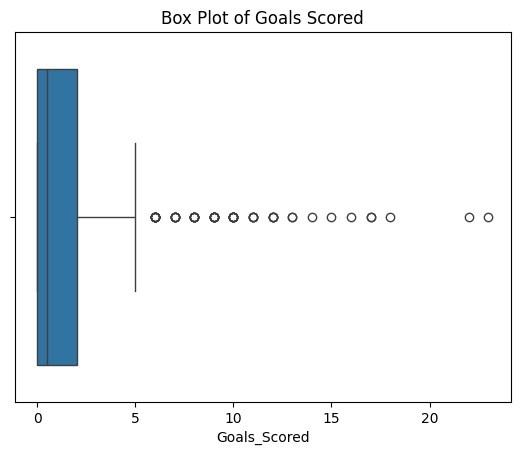

In [20]:
sns.boxplot(x='Goals_Scored', data=data)
plt.title("Box Plot of Goals Scored")
plt.show()

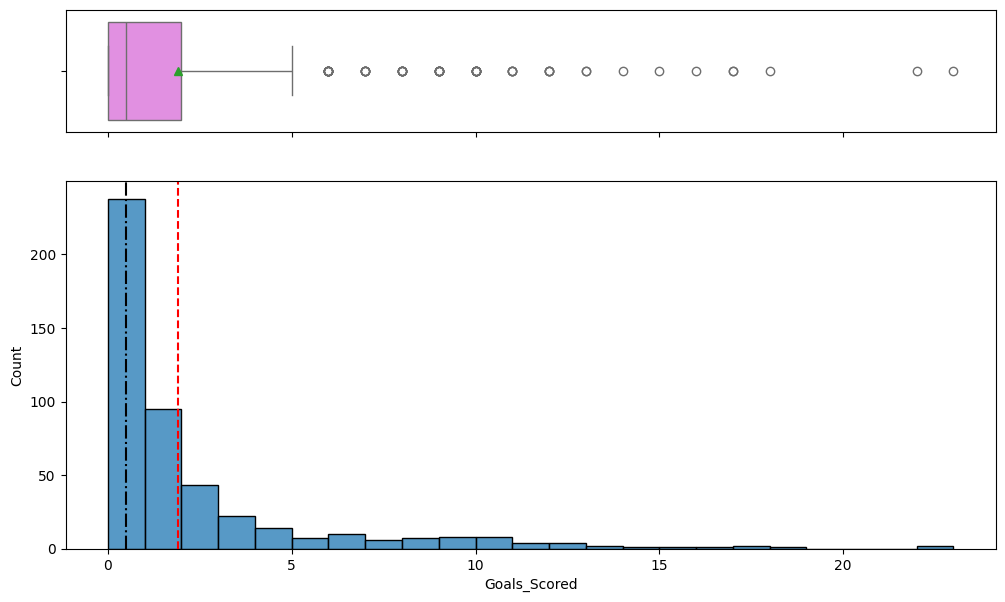

In [21]:
fig, ax = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': (1,3)},figsize = (12,7))
sns.boxplot(data = data, x = 'Goals_Scored', showmeans = True, color = 'violet', ax = ax[0])
sns.histplot(data = data, x = 'Goals_Scored', bins = 23, kde = False, ax = ax[1])
ax[1].axvline(x = data['Goals_Scored'].mean(), color = 'red', linestyle = '--')
ax[1].axvline(x = data['Goals_Scored'].median(), color = 'black', linestyle = '-.')
plt.show()

In [22]:
def histogram_boxplot_fun(data, feature, kde = False, bins = 23):
  fig, ax = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': (1,3)},figsize = (12,7))
  sns.boxplot(data = data, x = feature, showmeans = True, color = 'violet', ax = ax[0])
  sns.histplot(data = data, x = feature, bins = 23, kde = False, ax = ax[1])
  ax[1].axvline(x = data[feature].mean(), color = 'red', linestyle = '--')
  ax[1].axvline(x = data[feature].median(), color = 'black', linestyle = '-.')
  plt.show()

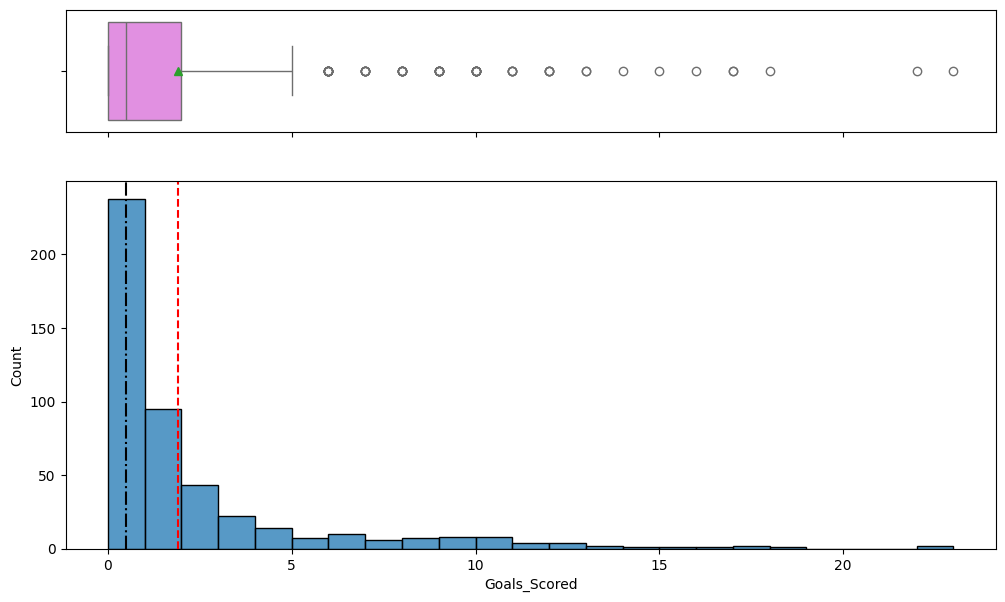

In [23]:
histogram_boxplot_fun(data, 'Goals_Scored')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot_fun(data, feature, bins=23, kde=False):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,         # Number of rows of the subplot grid = 2
        sharex=True,     # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (1, 3)},
        figsize=(12, 7)  # Creating the subplots
    )

    # Boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        color='violet'
    )

    # Histogram
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        bins=bins,
        color="skyblue"
    )

    # Add mean and median lines
    ax_hist2.axvline(x=data[feature].mean(), color='green', linestyle='--', label="Mean")
    ax_hist2.axvline(x=data[feature].median(), color='black', linestyle='-', label="Median")

    # Add legend
    ax_hist2.legend()

    plt.show()


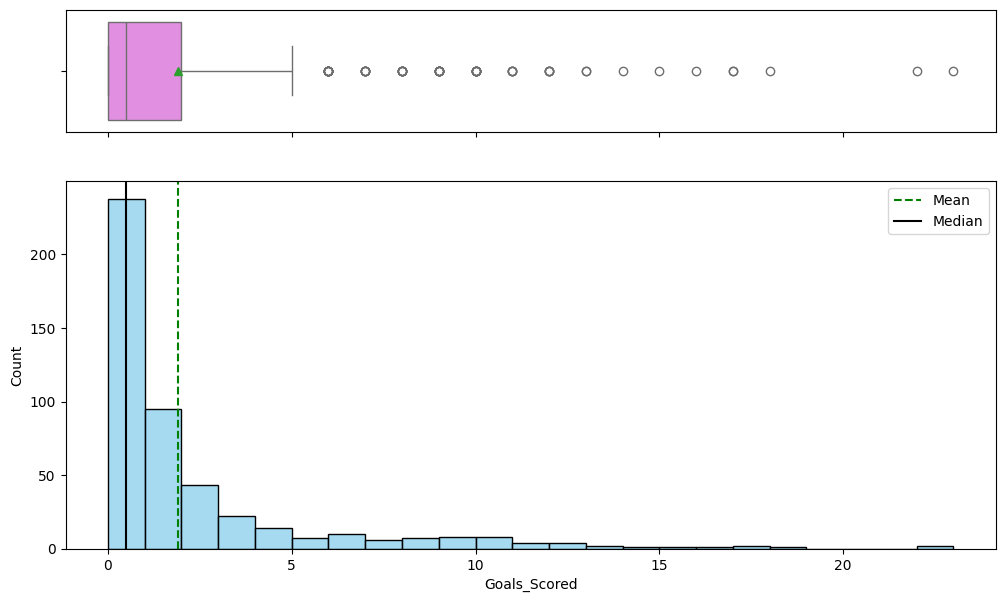

In [25]:
histogram_boxplot_fun(data, 'Goals_Scored')

In [26]:
data.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


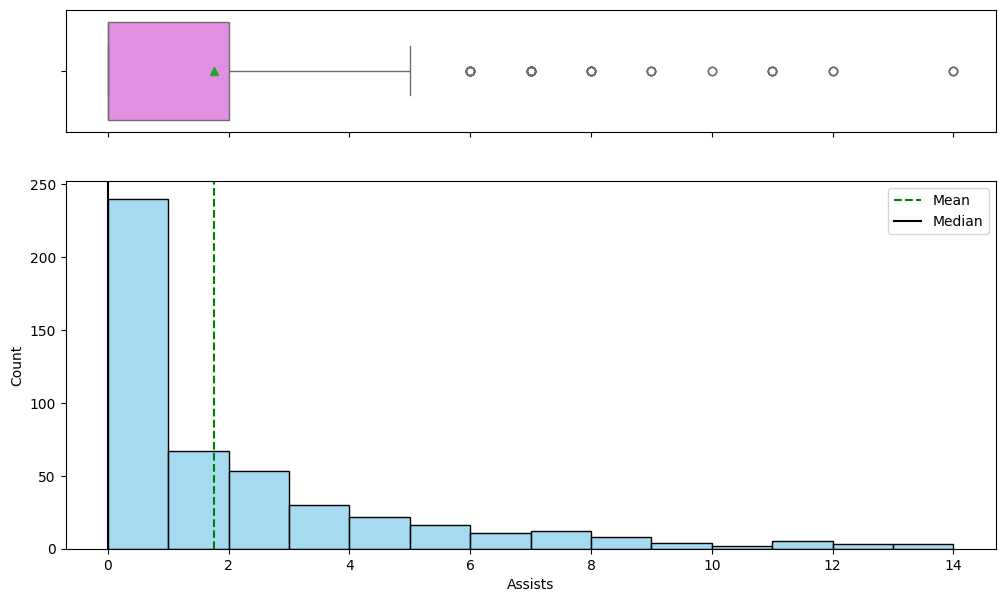

In [27]:
histogram_boxplot_fun(data, 'Assists', bins = 14)

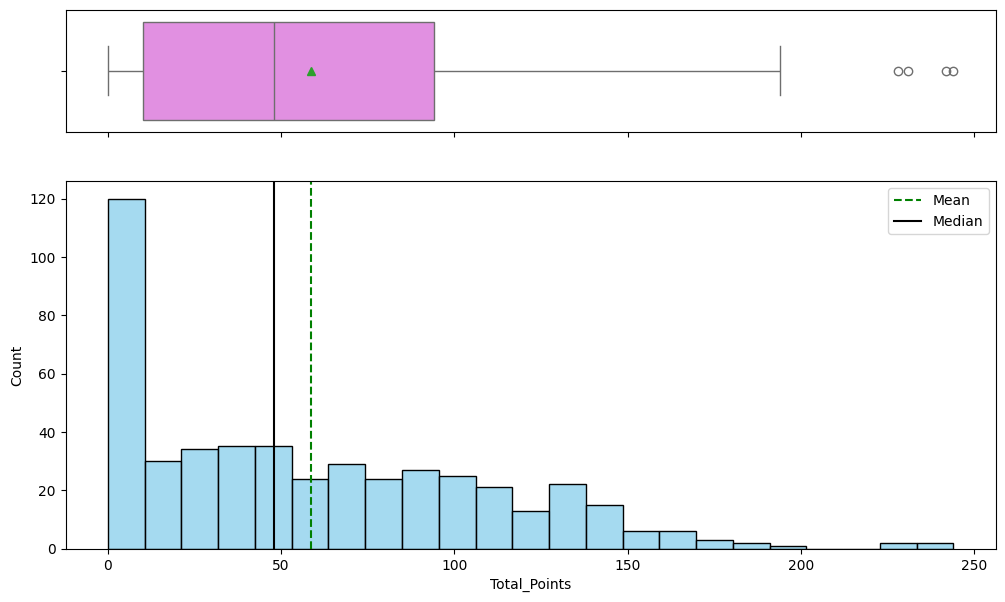

In [28]:
histogram_boxplot_fun(data, 'Total_Points', bins = 23)

In [29]:
data[data['Total_Points'] > 180]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13


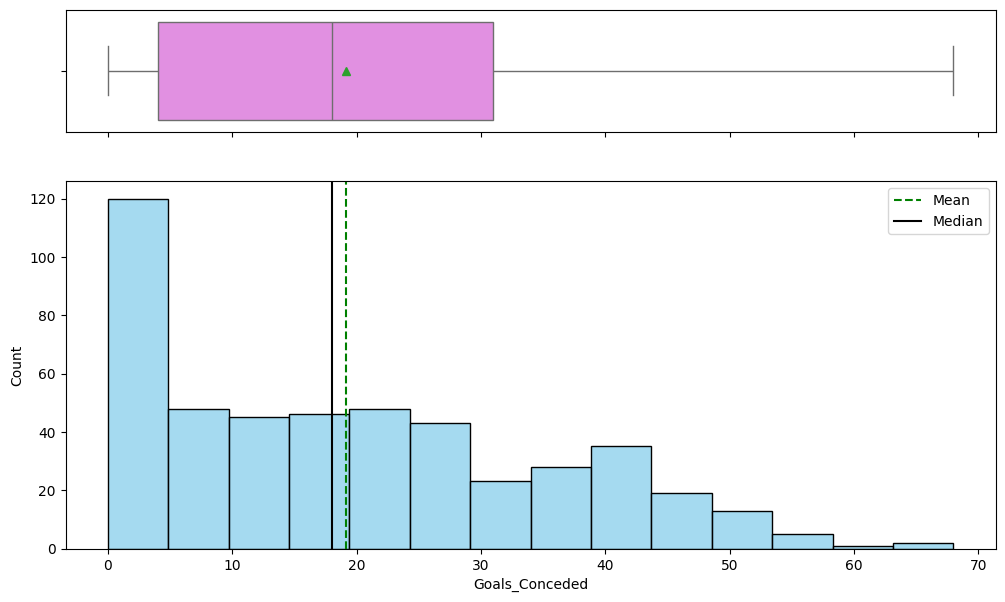

In [30]:
histogram_boxplot_fun(data, 'Goals_Conceded', bins = 14)

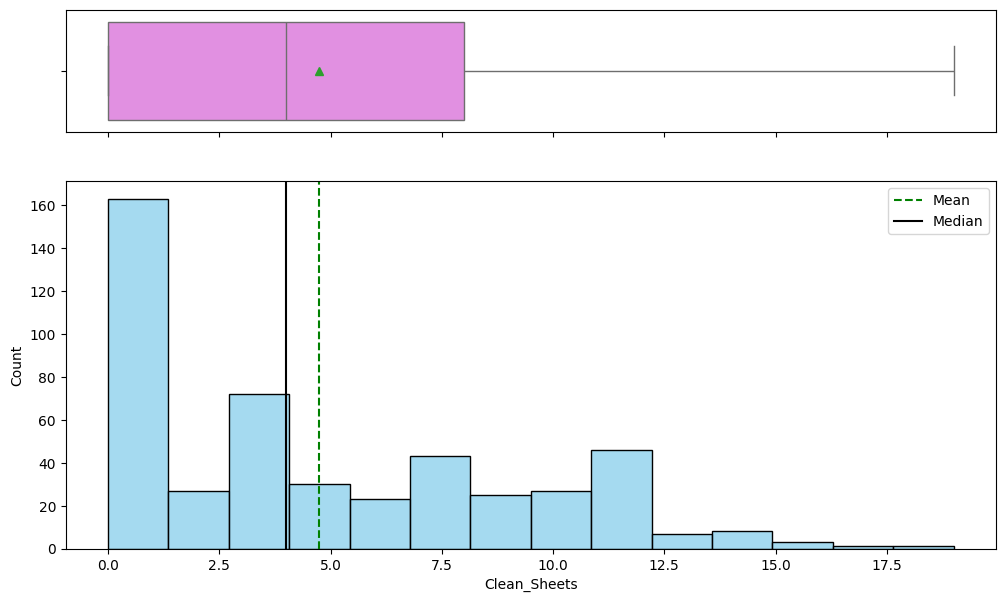

In [31]:
histogram_boxplot_fun(data, 'Clean_Sheets', bins = 14)

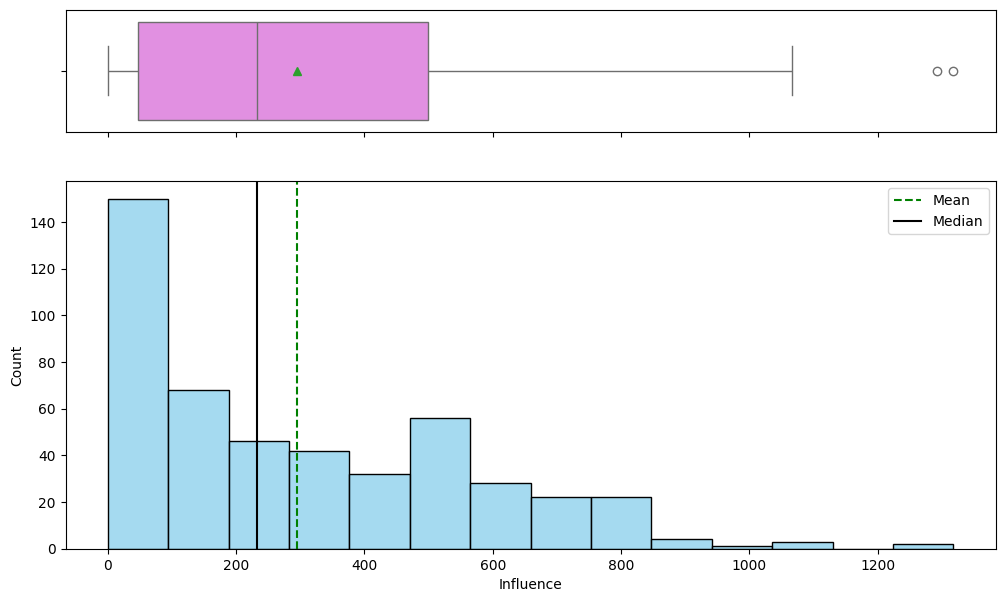

In [32]:
histogram_boxplot_fun(data, 'Influence', bins = 14)

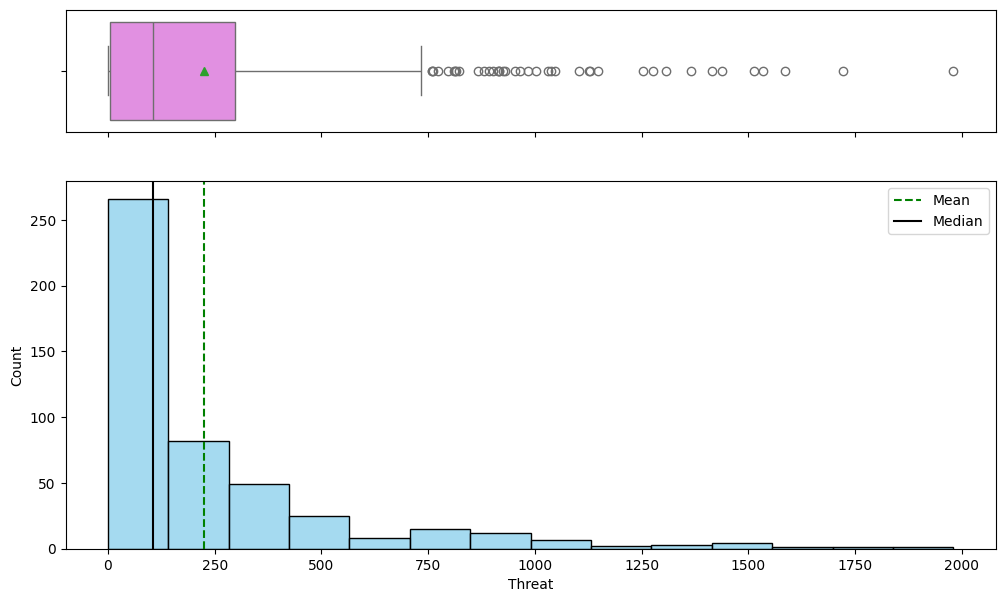

In [33]:
histogram_boxplot_fun(data, 'Threat', bins = 14)

# Multivariate Analysis


In [34]:
# Separating columns with numerical data types.
data_num = data.select_dtypes(include='number')

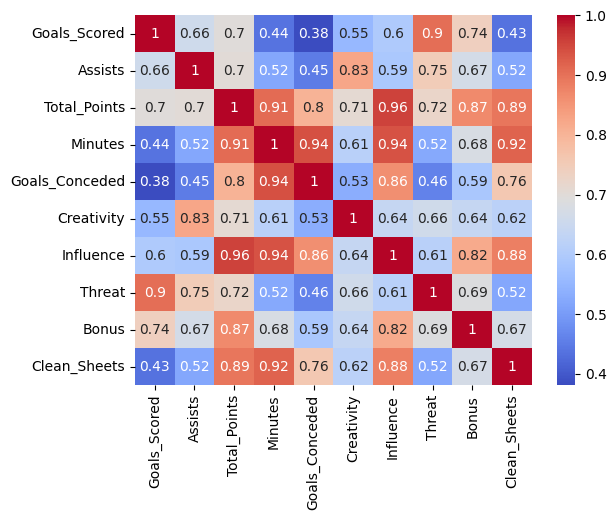

In [35]:
# Creating a correlation heatmap.
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')
plt.show()


# Observation
The highest correlation can be seen beteween 'Influence' and 'Total_Points' at 0.96.
The lowest correlation is seen between 'Goals_Conceded" and ' Goals_Scored' at 0.38.

In [36]:
def barplot_fun(data, feature, target):
    f2, ax = plt.subplots(figsize=(12, 7))

    sns.barplot(
        data=data,
        x=feature,
        y=target,
        ax=ax,
        color='violet',
        errorbar=None  # removes error bars
    )

    # Add mean line of target
    ax.axhline(y=data[target].mean(), color='green', linestyle='--', label="Mean")
    ax.legend()

    plt.show()


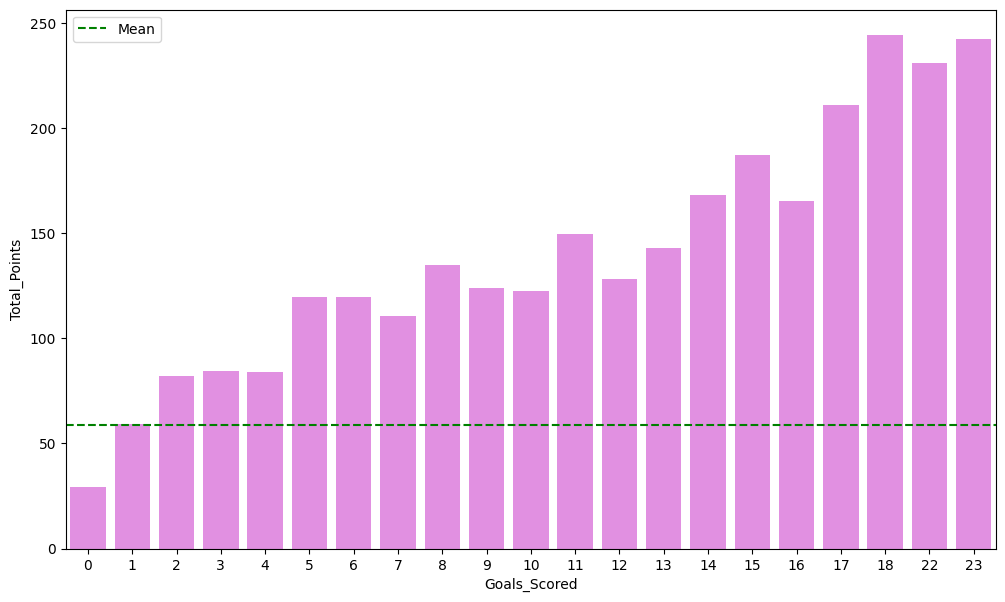

In [37]:
barplot_fun(data, 'Goals_Scored', 'Total_Points')

In [38]:
data.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


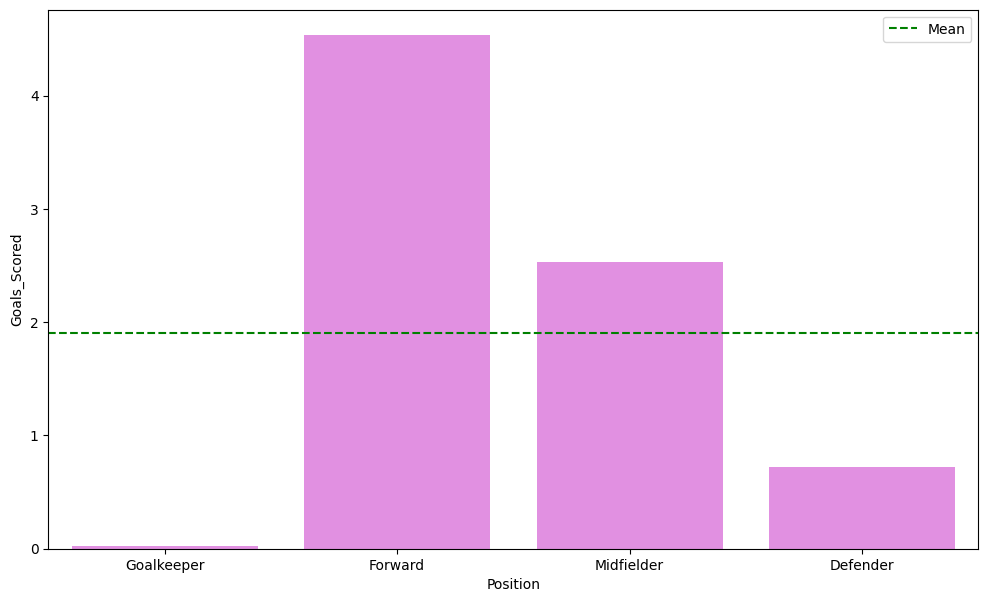

In [39]:
barplot_fun(data, 'Position', 'Goals_Scored')

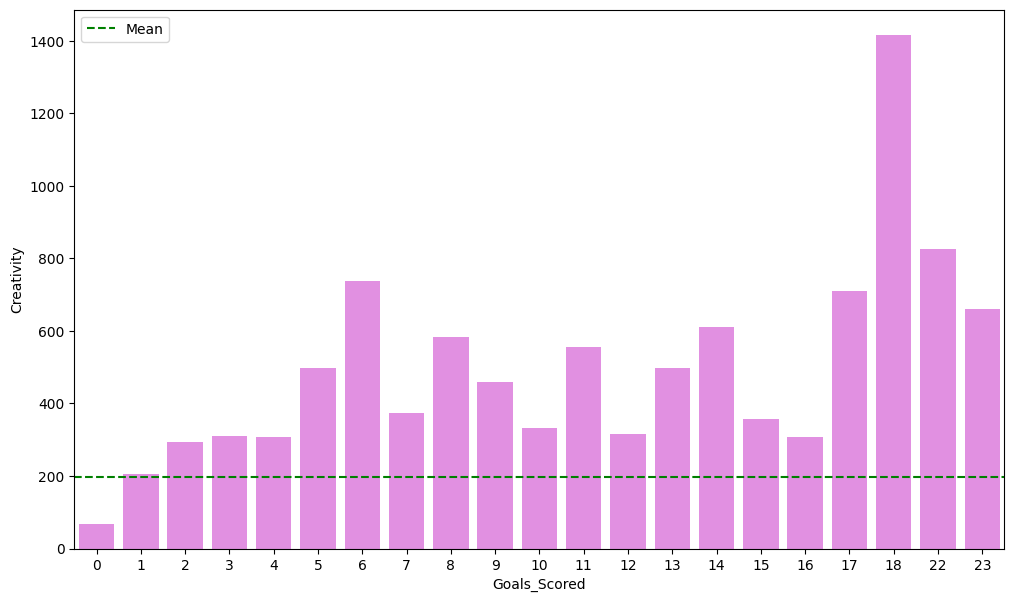

In [40]:
barplot_fun(data, 'Goals_Scored', 'Creativity')

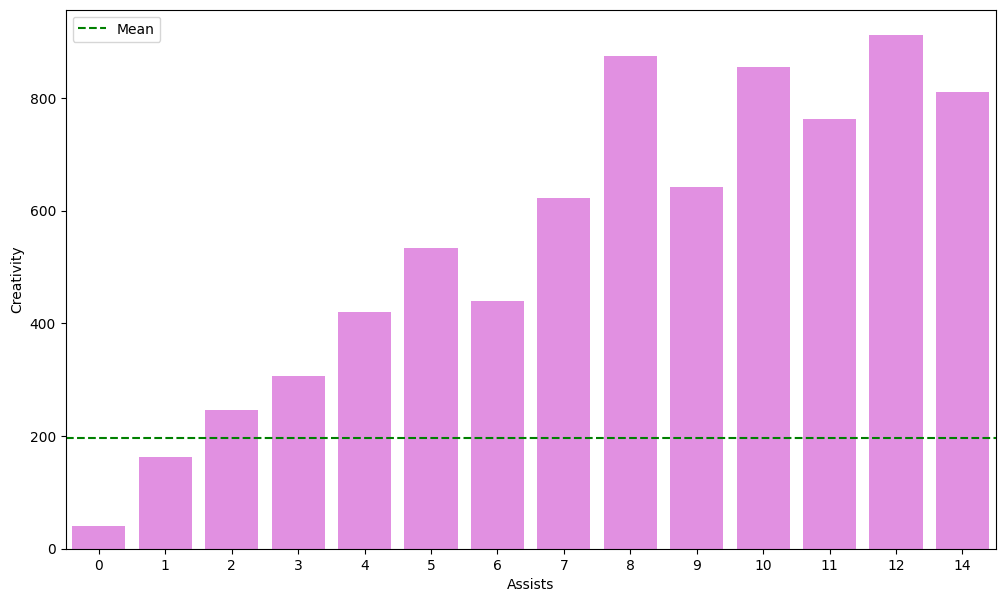

In [41]:
barplot_fun(data, 'Assists', 'Creativity')

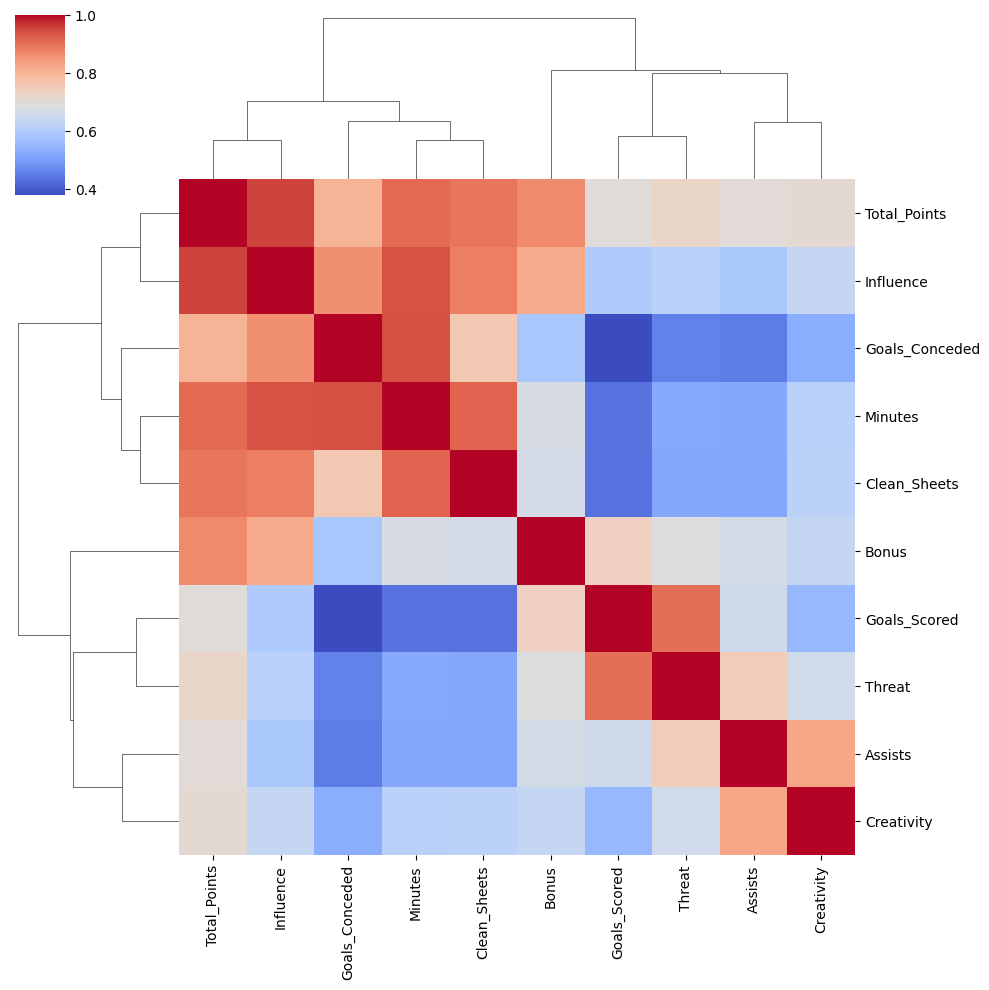

In [42]:
sns.clustermap(data_num.corr(), cmap="coolwarm")

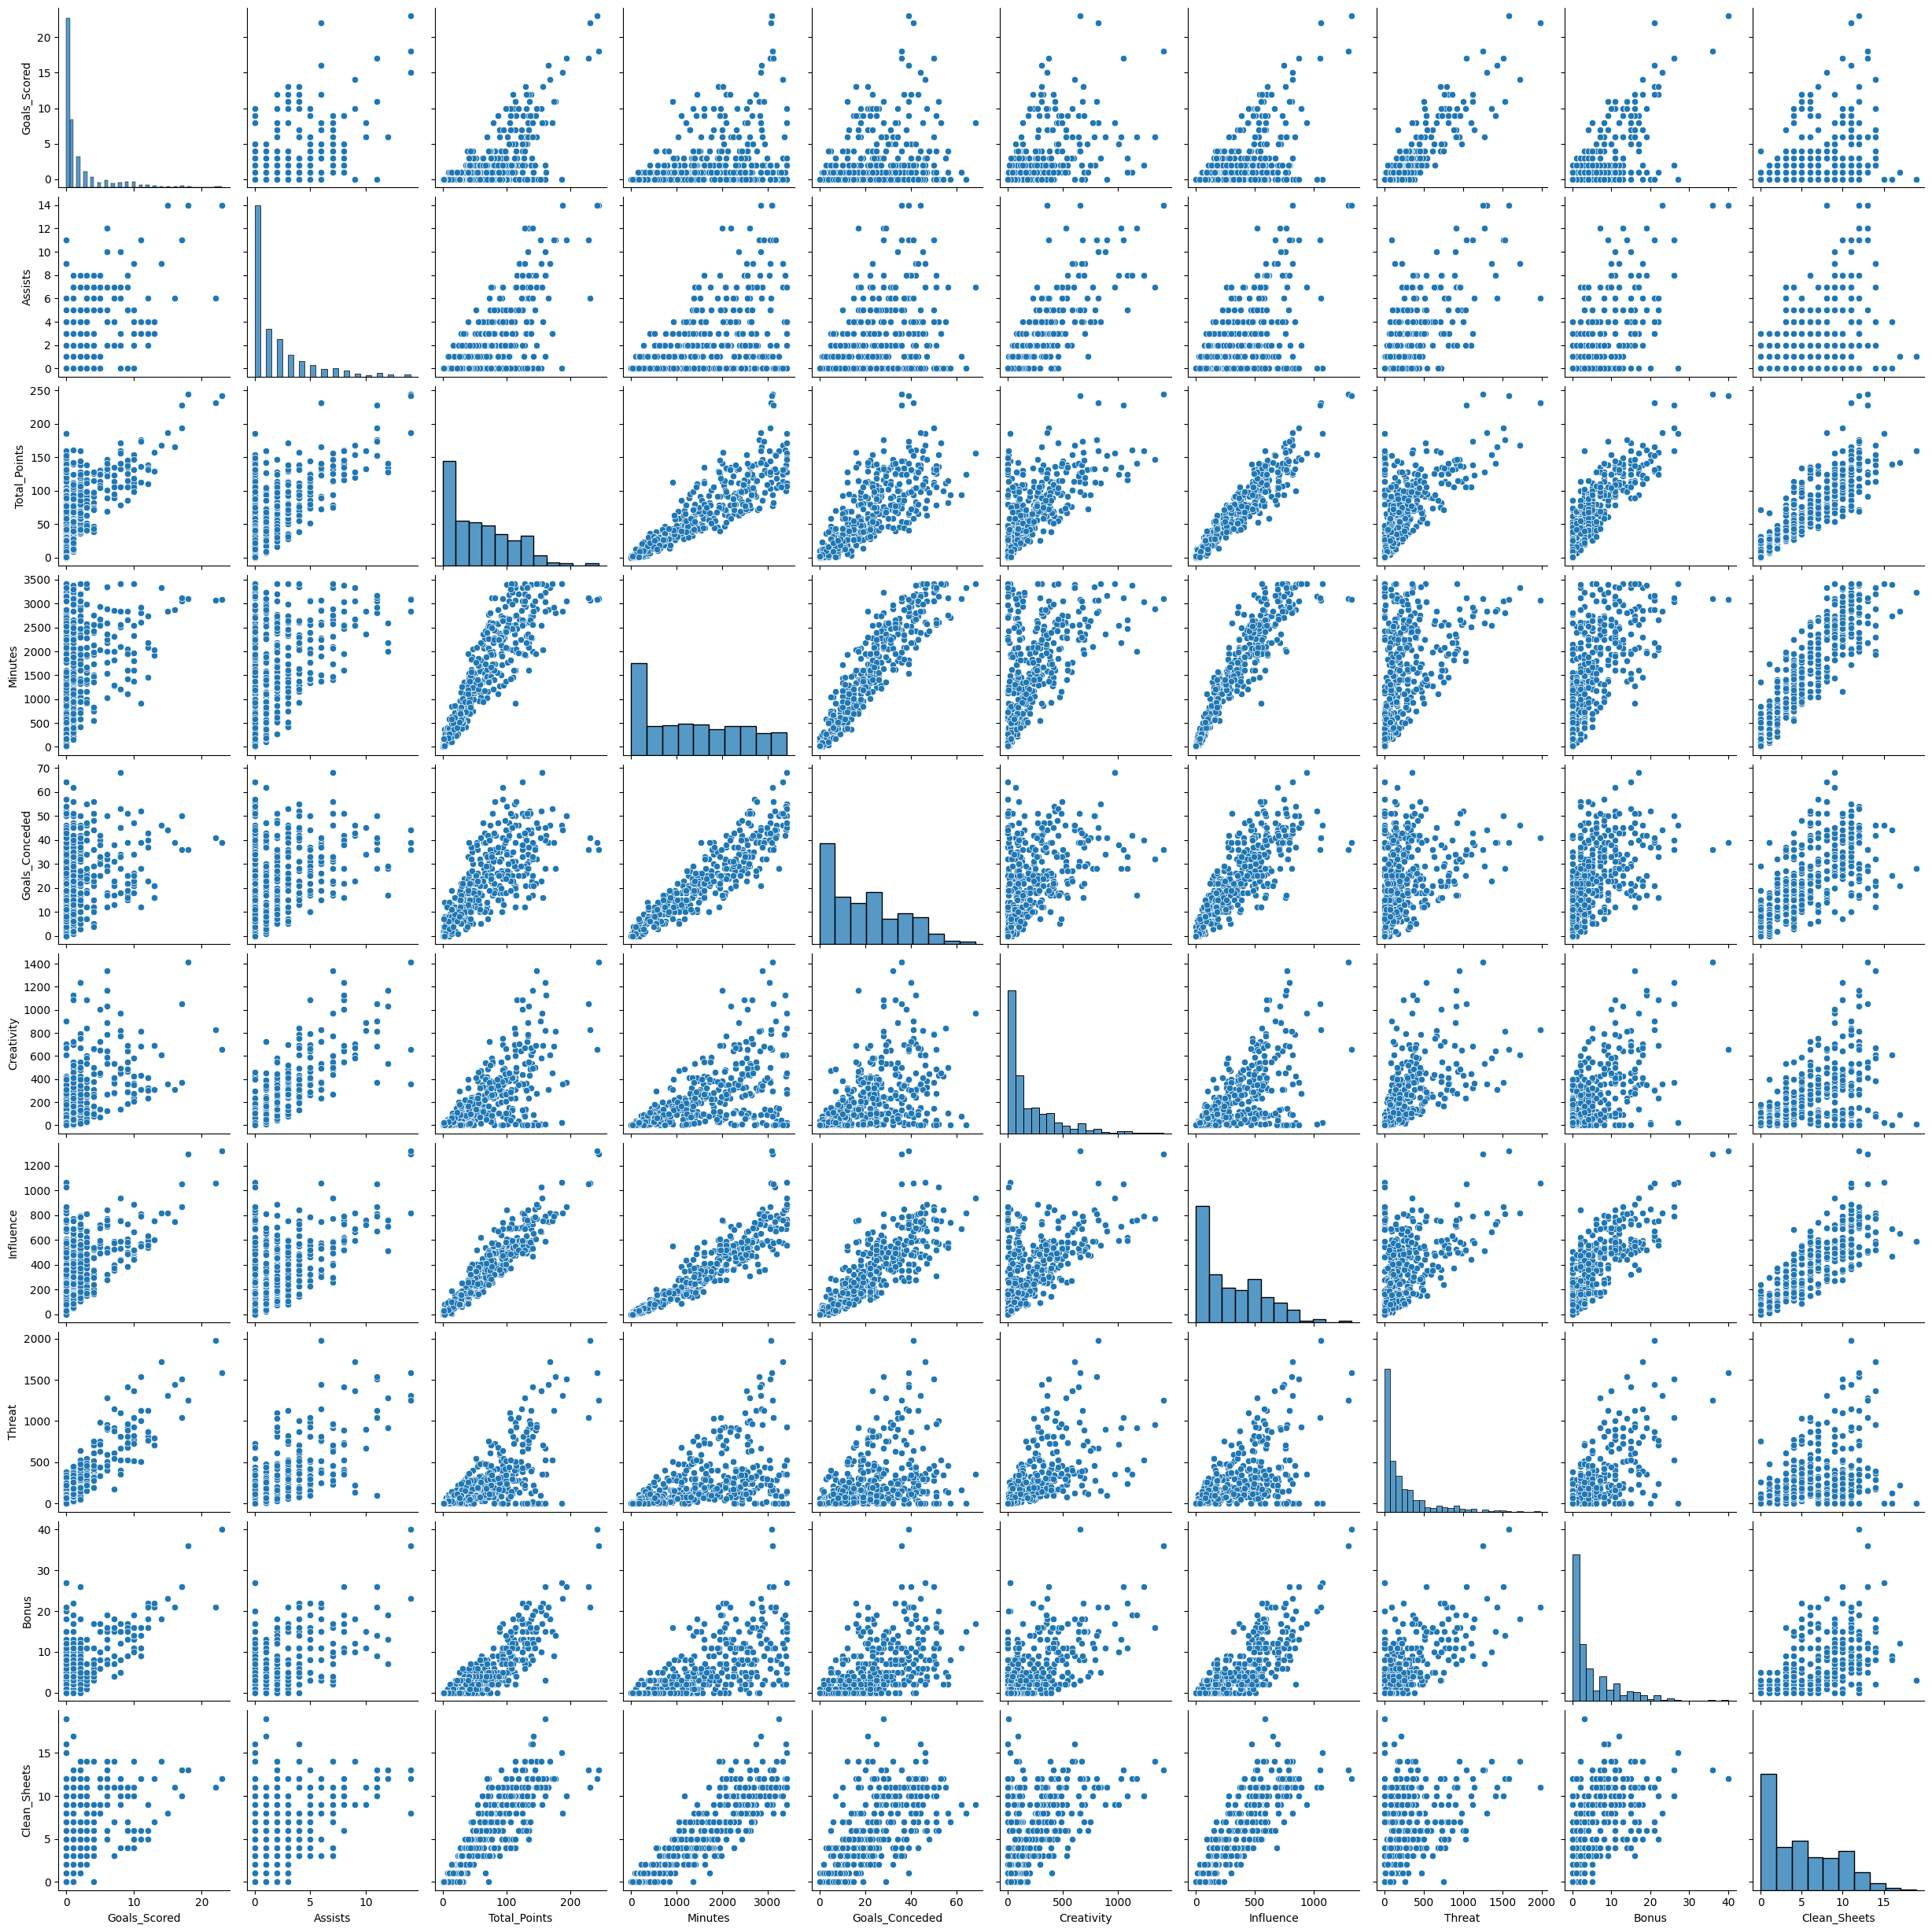

In [43]:
sns.pairplot(data, hue=None)